In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import sys
sys.path.append(str(Path.cwd() / "_scripts"))

In [ ]:
import seaborn as sns
import seaborn.objects as so
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.axes import Axes

from helpers.variable_interfaces import all_variables as vars
from setup.materials_setup import retrieve_cases
from setup.data_wrangle2 import *
from analysis.helpers import map_zone_names, extract_times
from analysis.plot_helpers import set_axis_ticks
# from analysis.dataframes import *
# from analysis.volumes import *

sns.set_style("darkgrid")

In [4]:
cases = retrieve_cases()

In [5]:
medium_cases = [i for i in cases if "Medium" in i.case_name]
[case] = [i for i in medium_cases if "red" in i.case_name]
case

CaseData(case_name='Medium_case_red_b1', idf=<geomeppy.idf.IDF object at 0x141c08160>, sql=Energy SQLiteResult: /Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/geomeppy/cases/material_exp/Medium_case_red_b1/results/eplusout.sql, path_to_input=PosixPath('/Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/svg2plan/outputs2/case_red_b1'), path_to_output=PosixPath('/Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/geomeppy/cases/material_exp/Medium_case_red_b1'))

In [177]:
zq = vars.afn.zone

df0 = create_wide_dataframe_for_many_qois(case, [vars.zone.temp["zone_mean_air_temp"], zq["vent_vol"], zq["mix_vol"], zq["vent_heat_gain"], zq["vent_heat_loss"]])
df = add_site_qois_wide(df0, case, [vars.site.temp["db"]])
df = map_zone_names(case.path_to_input, df)
df = extract_times(df)
order = list(df["room_names"].unique().sort())
df.head(3)

case_names,space_names,datetimes,Zone Mean Air Temperature [C],AFN Zone Ventilation Volume [m3],AFN Zone Mixing Volume [m3],AFN Zone Ventilation Sensible Heat Gain Rate [W],AFN Zone Ventilation Sensible Heat Loss Rate [W],Site Outdoor Air Drybulb Temperature [C],room_names,time
str,str,datetime[μs],f64,f64,f64,f64,f64,f64,str,str
"""Medium_case_red_b1""","""BLOCK 07 STOREY 0""",2017-07-01 00:00:00,25.311195,0.0,0.0,0.0,0.0,18.65,"""7-closet""","""00:00"""
"""Medium_case_red_b1""","""BLOCK 07 STOREY 0""",2017-07-01 00:15:00,25.109056,0.0,0.0,0.0,0.0,17.6,"""7-closet""","""00:15"""
"""Medium_case_red_b1""","""BLOCK 07 STOREY 0""",2017-07-01 00:30:00,24.9158,0.0,0.0,0.0,0.0,16.55,"""7-closet""","""00:30"""


<Axes: xlabel='time', ylabel='AFN Zone Ventilation Volume [m3]'>

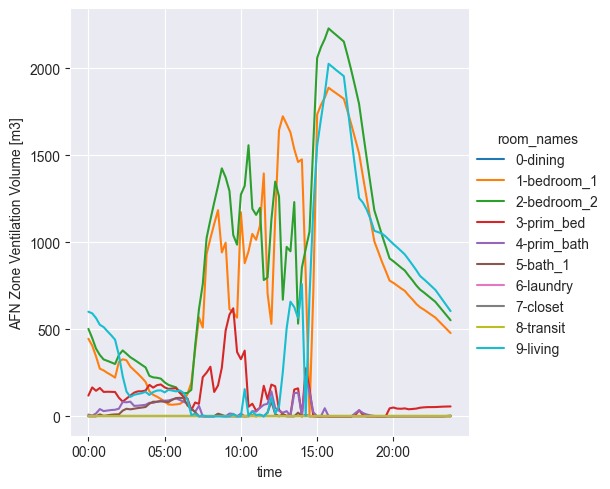

In [178]:
g = sns.relplot(df, x="time", y="AFN Zone Ventilation Volume [m3]", kind="line", hue="room_names", hue_order=order)
ax: Axes = g.axes.flat[0]
set_axis_ticks(ax)

<Axes: xlabel='time', ylabel='AFN Zone Mixing Volume [m3]'>

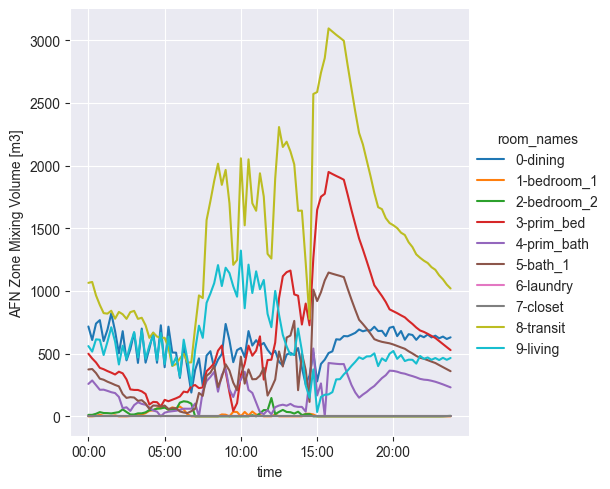

In [179]:
g = sns.relplot(df, x="time", y="AFN Zone Mixing Volume [m3]", kind="line", hue="room_names", hue_order=order)
ax: Axes = g.axes.flat[0]
set_axis_ticks(ax)

<Axes: xlabel='Site Outdoor Air Drybulb Temperature [C]', ylabel='Zone Mean Air Temperature [C]'>

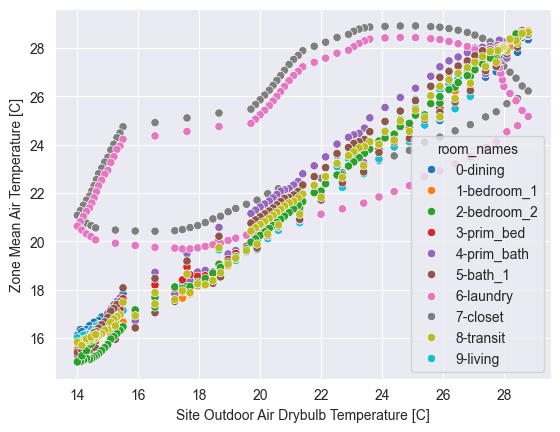

In [180]:
sns.scatterplot(df,x="Site Outdoor Air Drybulb Temperature [C]", y="Zone Mean Air Temperature [C]", hue="room_names", hue_order=order)

# shows that the rooms mostly have similar temps, except for the two that are not ventilated.. 

In [182]:
df = df.with_columns(temp_diff=pl.col("Zone Mean Air Temperature [C]") - pl.col("Site Outdoor Air Drybulb Temperature [C]"))

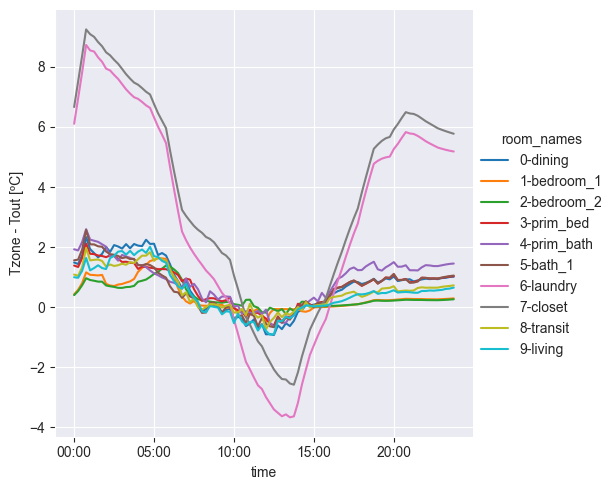

In [183]:

# Tin - Tout for diff rooms over time, + the average.. 
g = sns.relplot(df, x="time", y="temp_diff", kind="line", hue="room_names", hue_order=order)
ax: Axes = g.axes.flat[0]
set_axis_ticks(ax)
g.set_ylabels("Tzone - Tout [ºC]") # OR Net Temp Increase

# when its cold outside, the (ventilated) rooms are a bit warmer, when its warm outside the rooms are about the same or cooler.. 

In [184]:
# net heat gain vs time.. 
df = df.with_columns(net_heat_gain=pl.col("AFN Zone Ventilation Sensible Heat Gain Rate [W]") - pl.col("AFN Zone Ventilation Sensible Heat Loss Rate [W]"))
df.head(2)

case_names,space_names,datetimes,Zone Mean Air Temperature [C],AFN Zone Ventilation Volume [m3],AFN Zone Mixing Volume [m3],AFN Zone Ventilation Sensible Heat Gain Rate [W],AFN Zone Ventilation Sensible Heat Loss Rate [W],Site Outdoor Air Drybulb Temperature [C],room_names,time,temp_diff,net_heat_gain
str,str,datetime[μs],f64,f64,f64,f64,f64,f64,str,str,f64,f64
"""Medium_case_red_b1""","""BLOCK 07 STOREY 0""",2017-07-01 00:00:00,25.311195,0.0,0.0,0.0,0.0,18.65,"""7-closet""","""00:00""",6.661195,0.0
"""Medium_case_red_b1""","""BLOCK 07 STOREY 0""",2017-07-01 00:15:00,25.109056,0.0,0.0,0.0,0.0,17.6,"""7-closet""","""00:15""",7.509056,0.0


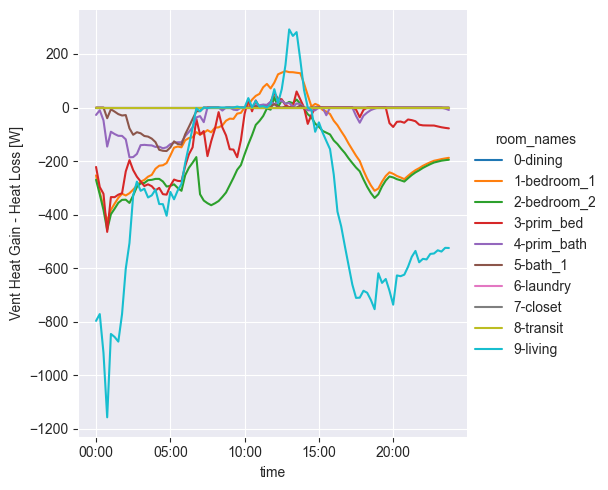

In [185]:
g = sns.relplot(df, x="time", y="net_heat_gain", kind="line", hue="room_names", hue_order=order)
ax: Axes = g.axes.flat[0]
set_axis_ticks(ax)
g.set_ylabels("Vent Heat Gain - Heat Loss [W]") # or Net Ventilation Heat Gain 

In [190]:
df_vent = df.filter((~pl.col("room_names").str.contains("laundry")) & (~pl.col("room_names").str.contains("closet")))
df_vent.head(2)



case_names,space_names,datetimes,Zone Mean Air Temperature [C],AFN Zone Ventilation Volume [m3],AFN Zone Mixing Volume [m3],AFN Zone Ventilation Sensible Heat Gain Rate [W],AFN Zone Ventilation Sensible Heat Loss Rate [W],Site Outdoor Air Drybulb Temperature [C],room_names,time,temp_diff,net_heat_gain
str,str,datetime[μs],f64,f64,f64,f64,f64,f64,str,str,f64,f64
"""Medium_case_red_b1""","""BLOCK 00 STOREY 0""",2017-07-01 00:00:00,20.137947,0.0,716.244104,0.0,0.0,18.65,"""0-dining""","""00:00""",1.487947,0.0
"""Medium_case_red_b1""","""BLOCK 00 STOREY 0""",2017-07-01 00:15:00,19.039879,0.0,608.474045,0.0,0.0,17.6,"""0-dining""","""00:15""",1.439879,0.0


<Axes: xlabel='net_heat_gain', ylabel='temp_diff'>

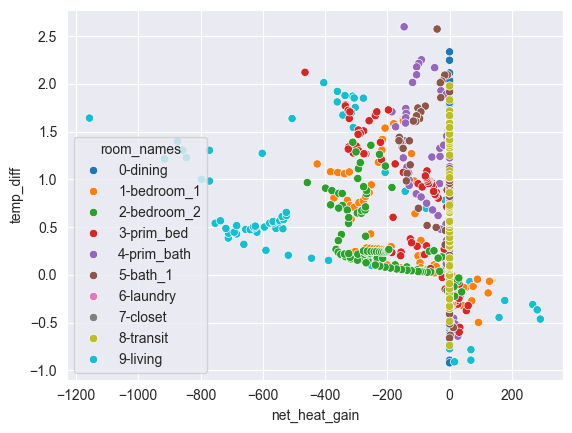

In [ ]:
# correlation.. 
g = sns.scatterplot(df_vent, x="net_heat_gain", y="temp_diff", hue="room_names", hue_order=order)

<Axes: xlabel='net_heat_gain', ylabel='AFN Zone Ventilation Volume [m3]'>

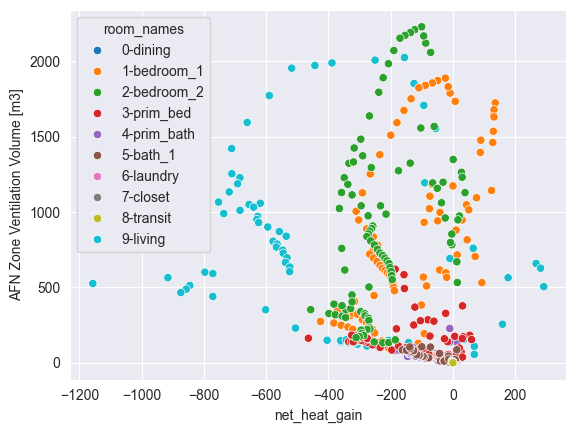

In [ ]:
sns.scatterplot(df_vent, x="net_heat_gain", y="AFN Zone Ventilation Volume [m3]", hue="room_names", hue_order=order)
# solar rad?

<Axes: xlabel='net_heat_gain', ylabel='AFN Zone Mixing Volume [m3]'>

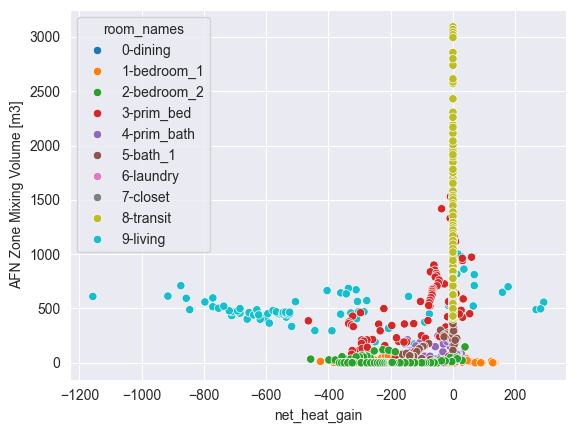

In [193]:
sns.scatterplot(df_vent, x="net_heat_gain", y="AFN Zone Mixing Volume [m3]", hue="room_names", hue_order=order)